# Project MSI

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [167]:
## b: default parameter
def set_default_parameter():
    p_common = 0.8
    sigma_v = 0.6
    sigma_a = 3.1
    sigma_p = 15
    mu_p = 0.0
    return p_common, sigma_v, sigma_a, sigma_p, mu_p


p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

In [168]:
def p_given_c1(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=1) 
    Eq. 4
    """
    denominator = sigma_v ** 2 * sigma_a ** 2 + sigma_v ** 2 * sigma_p ** 2 + sigma_a ** 2 * sigma_p ** 2
    exponent = -0.5 * (
        (x_v - x_a) ** 2 * sigma_p ** 2 + (x_v - mu_p) ** 2 * sigma_a ** 2 + (x_a - mu_p) ** 2 * sigma_v ** 2
    ) / denominator
    return 1 / (2 * np.pi * np.sqrt(denominator)) * np.exp(exponent)


def p_given_c2(x_v, x_a, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(x_v,x_a|C=2) 
    Eq. 6
    """
    denominator_v = sigma_v ** 2 + sigma_p ** 2
    denominator_a = sigma_a ** 2 + sigma_p ** 2
    exponent = -0.5 * (
        (x_v - mu_p) ** 2 / denominator_v + (x_a - mu_p) ** 2 / denominator_a
    )
    return 1 / (2 * np.pi * np.sqrt(denominator_v * denominator_a)) * np.exp(exponent)



def P_C1_given_perception(x_v, x_a, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15, mu_p=0):
    """
    p(C=1|x_v,x_a) = [p(x_v,x_a|C=1)*p_common]/[p(x_v,x_a|C=1)*p_common + p(x_v,x_a|C=2)*(1-p_common)]
    Eq. 2
    """
    p_given_c1_value = p_given_c1(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    p_given_c2_value = p_given_c2(x_v, x_a, sigma_v, sigma_a, sigma_p, mu_p)
    return p_given_c1_value * p_common / (
        p_given_c1_value * p_common + p_given_c2_value * (1 - p_common)
    )


### c: Plot probability of a common cause given noisy stimuli (default)

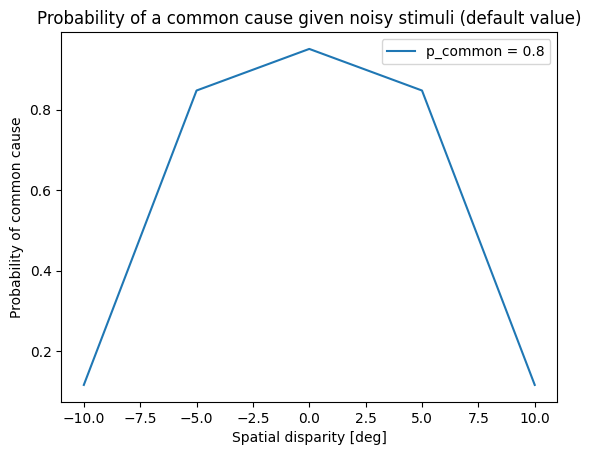

In [169]:
x_v_values = np.arange(-10, 10 + 1e-5, 5)  #locations extended from 10° to the left of the fixation point to 
#10° to the right of the fixation point at 5° intervals
x_a_values = np.zeros(5)
x_diff = x_v_values - x_a_values

P_C1_changeP = [P_C1_given_perception(x_v_values, x_a_values)]

for p in P_C1_changeP:
    plt.plot(x_diff, p, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that with default values the probability of common cause assumed by participant is less likely then not assuming it (less 50%) for more than +/-7.5°.

### probability of a common cause given noisy stimuli vary P_common
That means we change the prior beliefe, i.e. the prior uncertainty (increase with higher sigma).


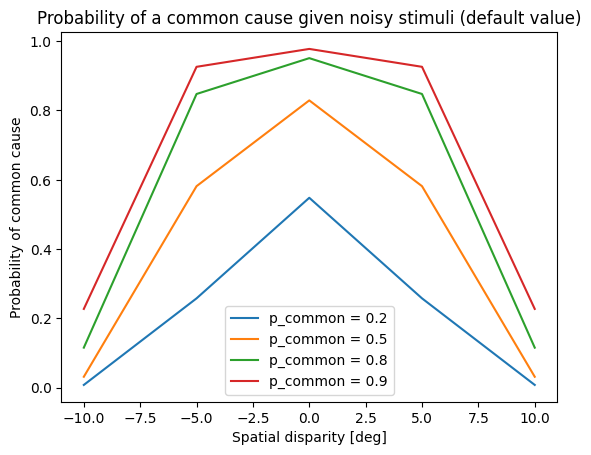

In [170]:
P_common_difference = [0.2, 0.5, 0.8, 0.9]
P_common_dict = {}
for p_common in P_common_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, p_common=p_common)
    P_common_dict[p_common] = P_C1_values

for p_common, p_values in P_common_dict.items():
    plt.plot(x_diff, p_values, label=f'p_common = {p_common}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_v
That means we make visual data different noisy (higher sigma = more noisy)


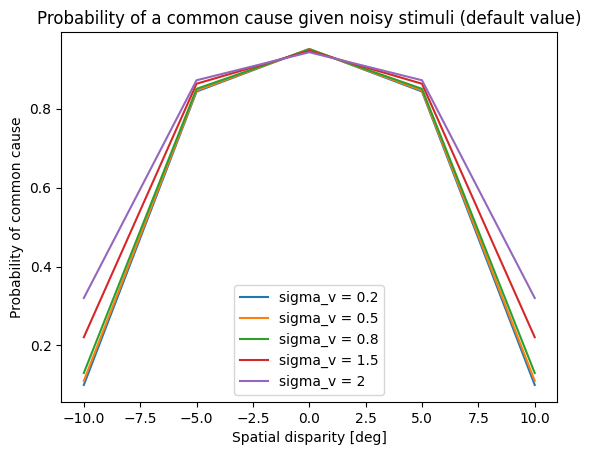

In [171]:
sigma_v_difference = [0.2, 0.5, 0.8, 1.5, 2]
sigma_v_dict = {}
for sigma_v in sigma_v_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_v=sigma_v)
    sigma_v_dict[sigma_v] = P_C1_values

for sigma_v, p_values in sigma_v_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_v = {sigma_v}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

### probability of a common cause given noisy stimuli vary sigma_a
That means we make the Auditory signal change in noise (higher sigma = more noisy).


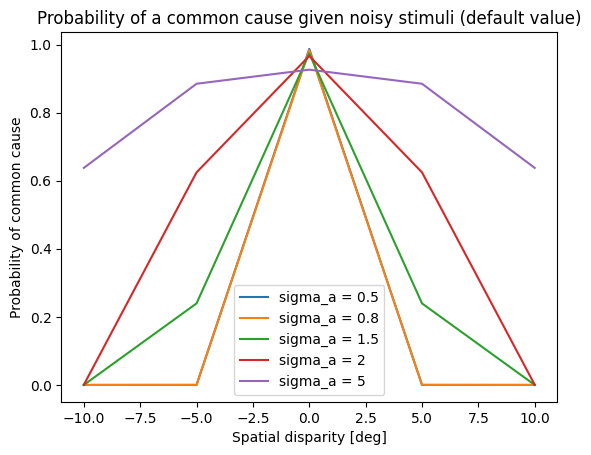

In [172]:
sigma_a_difference = [0.5, 0.8, 1.5, 2, 2, 5, 5]
sigma_a_dict = {}
for sigma_a in sigma_a_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_a=sigma_a)
    sigma_a_dict[sigma_a] = P_C1_values

for sigma_a, p_values in sigma_a_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_a = {sigma_a}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

Need more noise in audio to see a difference. 
But again higher noise increase probability of thinking its a common cause.

### probability of a common cause given noisy stimuli vary sigma_p

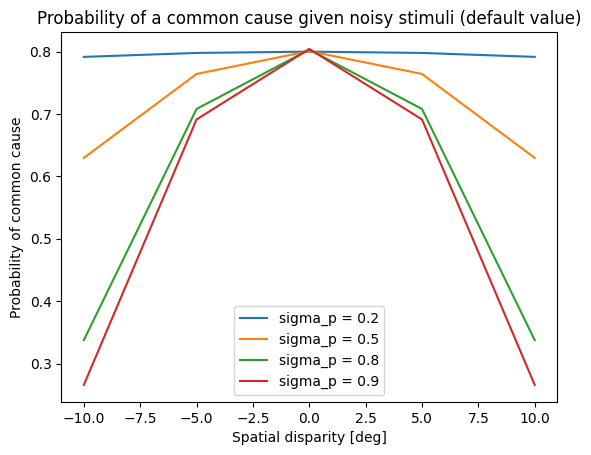

In [173]:
sigma_p_difference = [0.2, 0.5, 0.8, 0.9]
sigma_p_dict = {}
for sigma_p in sigma_p_difference:
    P_C1_values = P_C1_given_perception(x_v_values, x_a_values, sigma_p=sigma_p)
    sigma_p_dict[sigma_p] = P_C1_values

for sigma_p, p_values in sigma_p_dict.items():
    plt.plot(x_diff, p_values, label=f'sigma_p = {sigma_p}')
plt.xlabel('Spatial disparity [deg]')
plt.ylabel('Probability of common cause')
plt.title('Probability of a common cause given noisy stimuli (default value)')
plt.legend()
plt.show()

We see that the probability of common cause is higher with higher sigma_p, i.e. more noise in the prior belief.

### Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)


In [174]:
# Part (d) — Plot estimated stimulus positions ŝv and ŝa as a function of xv (assuming xa = 0)

# Default parameters
p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

def estimate_sv_sa(xv, xa, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0):
    """
    Estimate the visual and auditory stimulus positions based on noisy observations.
    Args:
        xv: Noisy visual observation.
        xa: Noisy auditory observation.
        p_common: Prior probability of common cause.
        sigma_v: Standard deviation of visual noise.
        sigma_a: Standard deviation of auditory noise.
        sigma_p: Standard deviation of spatial prior.
        mu_p: Mean of spatial prior.
    Returns:
        sv_hat: Estimated visual stimulus position.
        sa_hat: Estimated auditory stimulus position.
    """
    
    # Compute p(C=1|xv, xa) (Eq. 2)
    p_c1 = P_C1_given_perception(xv, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)

    # Compute sv_c2 and sa_c2 (Eq. 11)
    sv_c2 = (xv / sigma_v**2 + mu_p / sigma_p**2) / (1 / sigma_v**2 + 1 / sigma_p**2)
    sa_c2 = (xa / sigma_a**2 + mu_p / sigma_p**2) / (1 / sigma_a**2 + 1 / sigma_p**2)

    # Compute s_common (Eq. 12)
    s_common = (xv / sigma_v**2 + xa / sigma_a**2 + mu_p / sigma_p**2) / \
               (1 / sigma_v**2 + 1 / sigma_a**2 + 1 / sigma_p**2)

    # Compute sv_hat and sa_hat (Eq. 9 and Eq. 10)
    sv_hat = p_c1 * s_common + (1 - p_c1) * sv_c2
    sa_hat = p_c1 * s_common + (1 - p_c1) * sa_c2

    return sv_hat, sa_hat


def plot_estimated_positions(xv_vals, xa=0.0, p_common=0.8, sigma_v=0.6, sigma_a=3.1, sigma_p=15.0, mu_p=0.0, ax=None):
    sv_hats, sa_hats = estimate_sv_sa(xv_vals, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)

    if ax is None:
        ax = plt.gca()

    ax.plot(xv_vals, np.array(sv_hats).flatten(), label="Estimated $\hat{s}_v$")
    ax.plot(xv_vals, np.array(sa_hats).flatten(), label="Estimated $\hat{s}_a$")
    ax.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    ax.set_xlabel("$x_v$ (Visual observation)")
    ax.set_ylabel("Estimated position")
    ax.set_title(
        fr"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$"
        f"\n (with $x_a = 0$, $p_{{common}} = {p_common}$, "
        f"$\sigma_v = {sigma_v}$, $\sigma_a = {sigma_a}$, $\sigma_p = {sigma_p}$)"
    )
    ax.legend()
    ax.grid(True)


<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:35: SyntaxWarning: invalid escape sequence '\h'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:35: SyntaxWarning: invalid escape sequence '\h'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\1242220357.py:34: SyntaxWarning: invalid escape sequence '\h'
  ax.plot(xv_vals, np.array(sv_hats).flatten(), label="Estimated $\hat{s}_v$")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\1242220357.py:35: SyntaxWarning: invalid escape sequence '\h'
  ax.plot(xv_vals, np.array(sa_hats).flatten(), label="Estimated $\hat{s}_a$")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\1242220357.py:42: SyntaxWarning: invalid escap

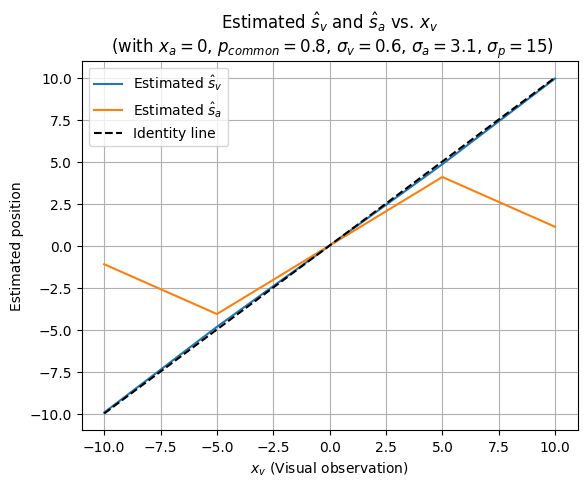

In [175]:
#xv_vals = np.linspace(-10, 10, 200)

plot_estimated_positions(x_v_values, x_a_values, p_common=p_common, sigma_v=sigma_v, sigma_a=sigma_a, sigma_p=sigma_p,
                         mu_p=mu_p)
plt.show()

$x_v$ is the observed (noisy) visual cue. 
$\hat{{s}}_v$ is estimated true visual stimulus position (blue)
$\hat{{s}}_a$ is estimated true auditory stimulus position (orange)

From the plot we observed when $x_v$ is close to zero, under the assumption $x_a$ is 0, the two stimulus integrate to a common cause, i.e. the estimated positions are close to each other. 
When $x_v$ is far away from zero the estimated positions diverge, i.e. the visual and auditory stimulus are not integrated. 
At large disparities, the estimates diverge — reflecting segregation due to low posterior for a common cause (The posterior p(C=1∣$x_v$,$x_a$) drops, and p(C=2∣$x_v$​,$x_a$​) increases.).

The identity line in the plot, shows the estimated position if the system relied purely on the visual input. 
So $\hat{{s}}$ = $x_v$. If the estimated visual position s^vs^v​ follows the identity line, it means the estimate is fully determined by the visual cue — i.e., no integration is happening.

### Varying $p_{{common}}$, $\sigma_v$, $\sigma_a$, $\sigma_p$ (with few points like experiment)

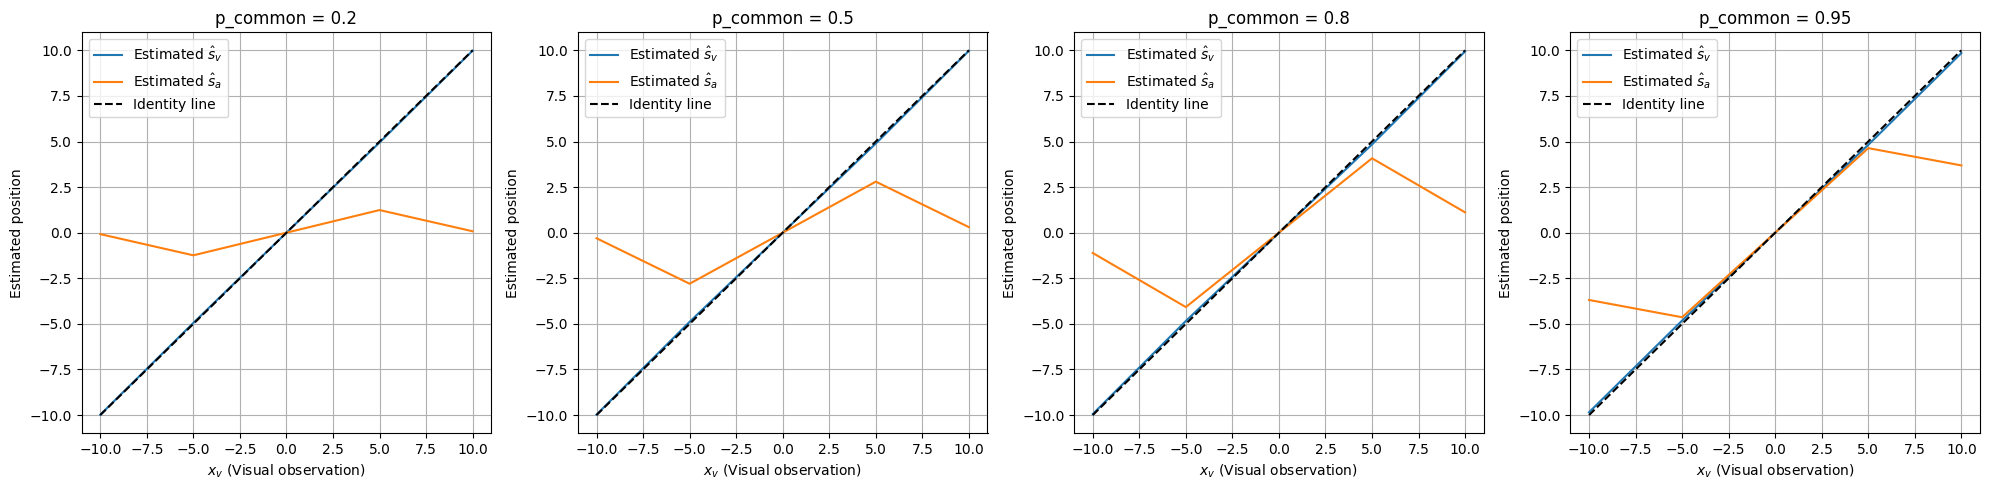

In [176]:
#varying p_common
p_common_values = [0.2, 0.5, 0.8, 0.95]

fig, axes = plt.subplots(1, len(p_common_values), figsize=(20, 5))  # 1 row, 4 columns

for ax, p_common in zip(axes, p_common_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        p_common=p_common,
        ax=ax
    )
    ax.set_title(f'p_common = {p_common}')

plt.tight_layout()
plt.show()

Varying $p_{{common}}$ means changing the belief in common cause. if we increase this beliefe, the estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ get closer together, indicating that even with higher spatial disparity ($x_v$ more far away from zero and so from $x_a$) the beliefe in common cause is high and lead to close estimation of the two stimuli. So with higher prior belief in a common cause, the range in which visual stimulus affects auditory stimulus estimation increase. 

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\117757765.py:12: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'$\sigma_a$ = {sigma_a}')


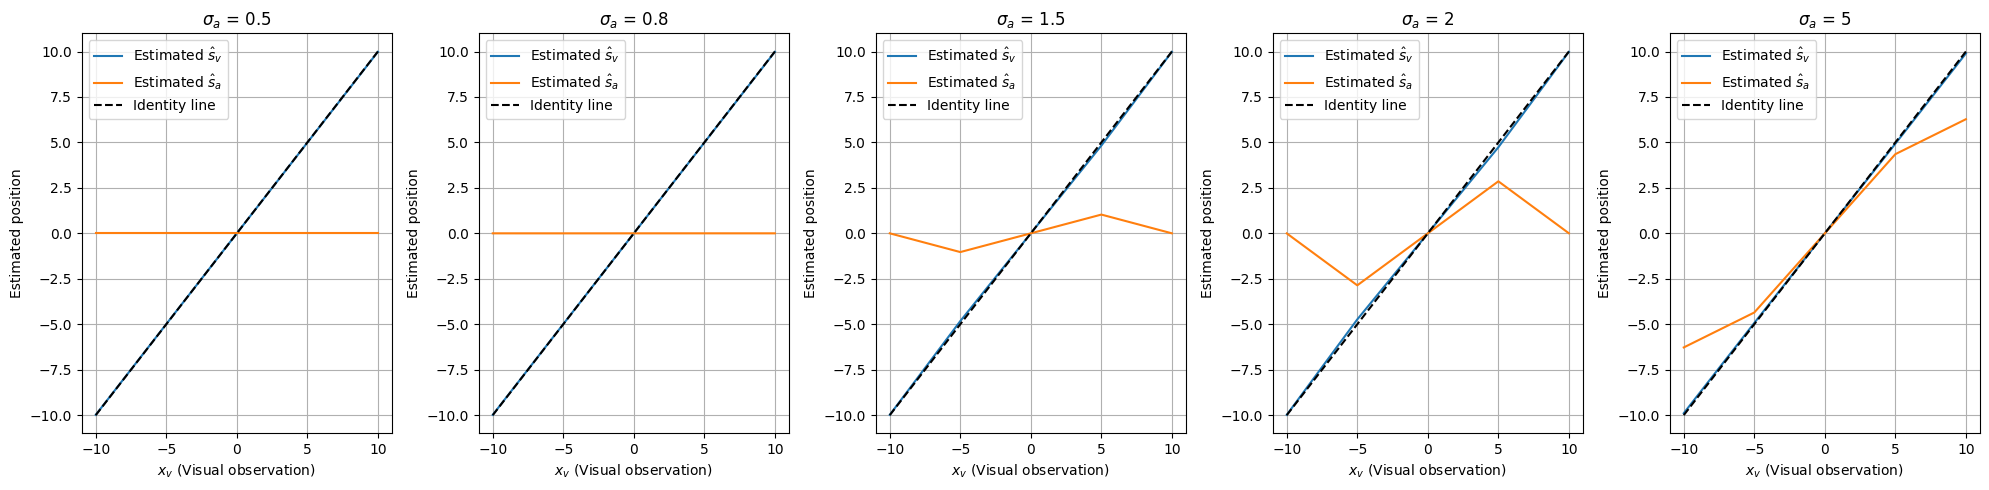

In [177]:
# Varying sigma_a
sigma_a_values = [0.5, 0.8, 1.5, 2, 5]

fig, axes = plt.subplots(1, len(sigma_a_values), figsize=(20, 5))

for ax, sigma_a in zip(axes, sigma_a_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_a=sigma_a,
        ax=ax
    )
    ax.set_title(f'$\sigma_a$ = {sigma_a}')

plt.tight_layout()
plt.show()

Varying $\sigma_a$ changes the nosie of auditory data. 
Higher noise, pushes away the estimated $\hat{{s}}_a$ from the horizontal line zero (caused by $x_a$ = 0). 
The noiser the auditory signal get, the higher the probability of belief in common cause (with $\sigma_a$ = 5 high overlap from $\hat{{s}}_a$ and $\hat{{s}}_v$). 

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\2858299497.py:12: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'$\sigma_v$ = {sigma_v}')


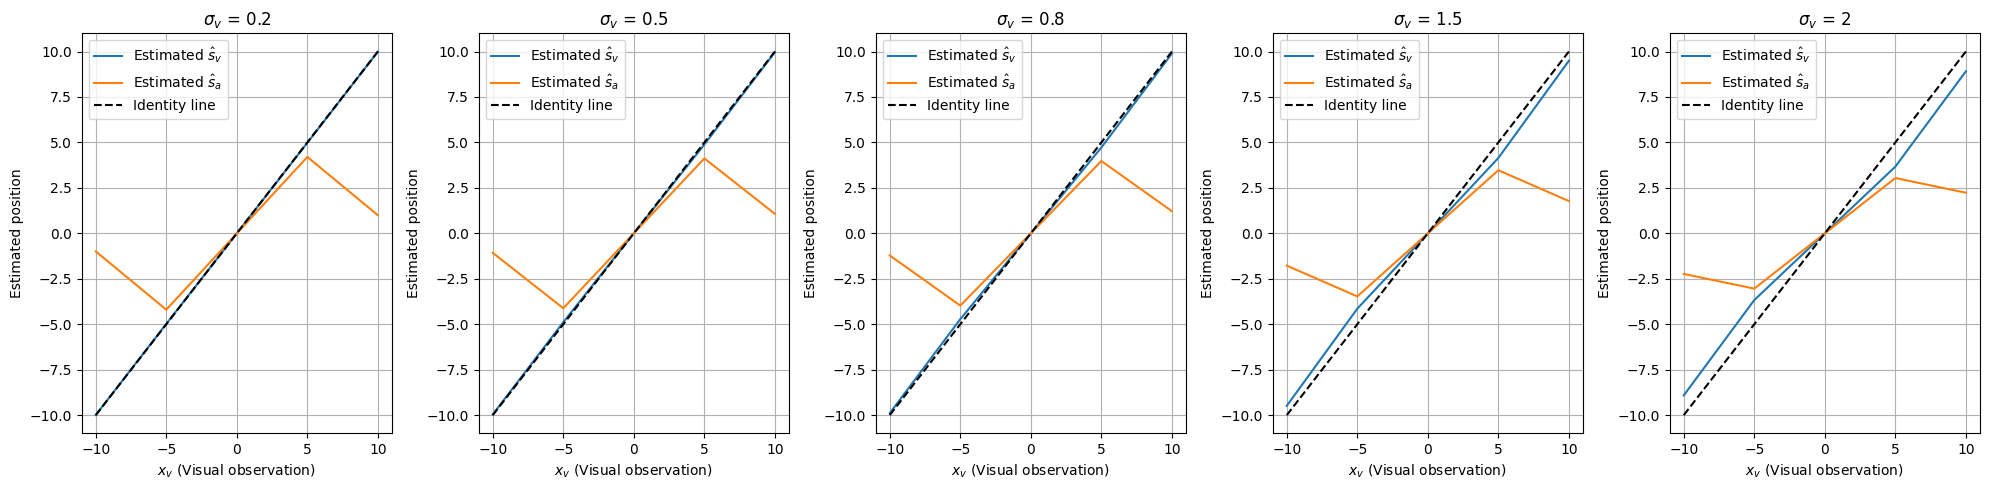

In [178]:
# Varying sigma_v
sigma_v_values = [0.2, 0.5, 0.8, 1.5, 2]

fig, axes = plt.subplots(1, len(sigma_v_values), figsize=(20, 5))

for ax, sigma_v in zip(axes, sigma_v_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_v=sigma_v,
        ax=ax
    )
    ax.set_title(f'$\sigma_v$ = {sigma_v}')

plt.tight_layout()
plt.show()

Varying $\sigma_v$ changes the nosie of visual data. 
Higher noise, pushes away the estimated $\hat{{s}}_v$ from the identity line(caused by varying $x_v$ on x-axis). 
The noiser the visual signal get, the higher the probability of belief in common cause (with $\sigma_v$ = 2 high overlap from $\hat{{s}}_a$ and $\hat{{s}}_v$) and the more away the estimated visual signal get from identity line. 


<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\1265673195.py:11: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'$\sigma_p$ = {sigma_p}')


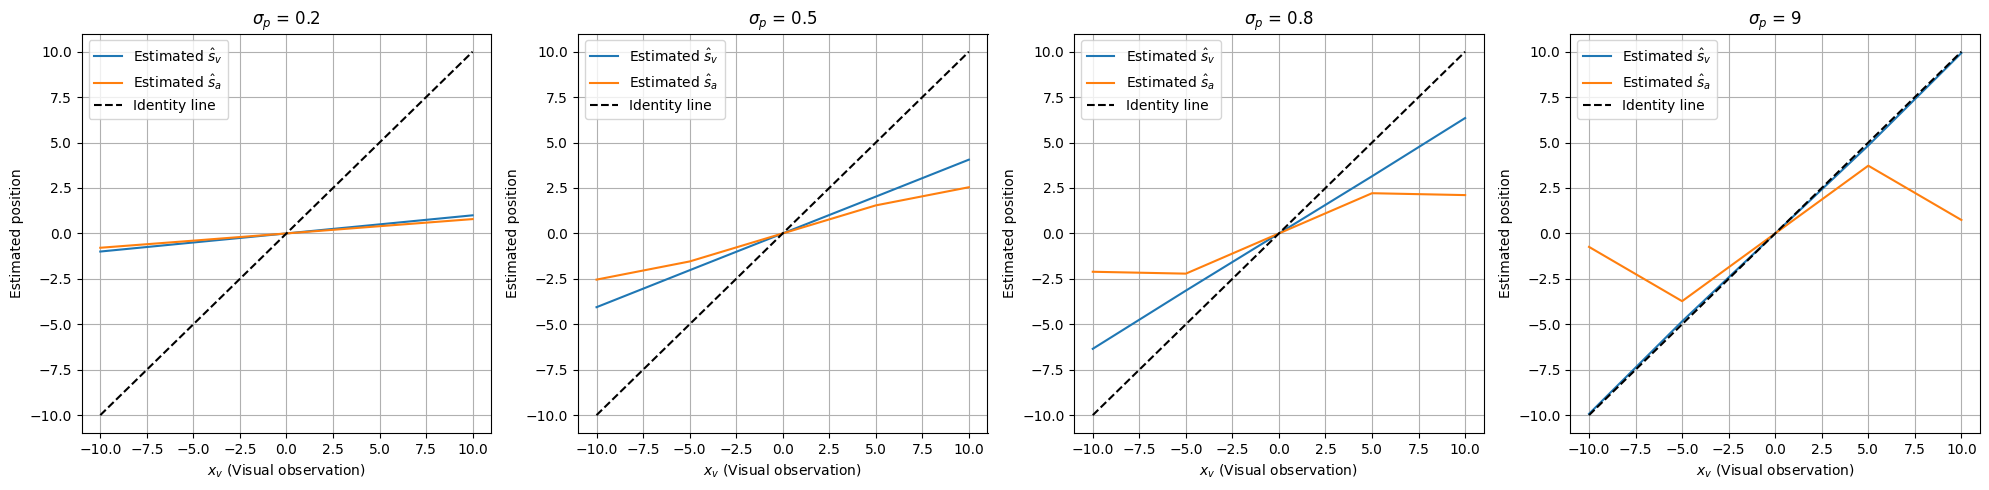

In [179]:
# Varying sigma_p
sigma_p_values = [0.2, 0.5, 0.8, 9]
fig, axes = plt.subplots(1, len(sigma_p_values), figsize=(20, 5))

for ax, sigma_p in zip(axes, sigma_p_values):
    plot_estimated_positions(
        xv_vals=x_v_values,
        sigma_p=sigma_p,
        ax=ax
    )
    ax.set_title(f'$\sigma_p$ = {sigma_p}')

plt.tight_layout()
plt.show()

Varying $\sigma_p$ changes the prior uncertainty. 
Increasing $\sigma_p$ brings the estimated values closer to the values we observe before and first more far away from each other, but then both closer to identity line (as $\sigma_v$ is smaller, means visual stimulus is less noisy and dominate). 
While with a low prior uncertainty, $\hat{{s}}_a$ and $\hat{{s}}_v$ are close to each other (so high probabilty of common cause) and far away from identity line.
With $\sigma_p$ close to zero, there is a strong bias towards expecting the stimuli straight ahead, and therefore, estimated them at center (horizontal zero) regardless  of the visual observation. 

### Varying $p_{{common}}$, $\sigma_v$, $\sigma_a$, $\sigma_p$ (more than the 5 measure points of experiment for smooth curves)

In [180]:
def plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=None, **kwargs):
    """
    Plot estimated stimulus positions ŝv and ŝa for varying parameter values in a single diagram.
    
    Args:
        xv_vals: Array of visual observation values.
        xa: Fixed auditory observation value.
        param_name: Name of the parameter to vary (e.g., "p_common").
        param_values: List of values for the parameter to vary.
        kwargs: Other fixed parameters.
    """

    if param_values is None:
        default_params = {
            "p_common": 0.8,
            "sigma_v": 0.6,
            "sigma_a": 3.1,
            "sigma_p": 15.0,
            "mu_p": 0.0
        }
        param_values = [kwargs.get(param_name, default_params.get(param_name, 0.0))]

    plt.figure(figsize=(10, 6))

    for param_value in param_values:
        kwargs[param_name] = param_value
        sv_hats, sa_hats = [], []
        for xv in xv_vals:
            sv_hat, sa_hat = estimate_sv_sa(xv, xa, **kwargs)
            sv_hats.append(sv_hat)
            sa_hats.append(sa_hat)

        plt.plot(xv_vals, sv_hats, label=f"$\hat{{s}}_v$ ({param_name}={param_value})")
        plt.plot(xv_vals, sa_hats, label=f"$\hat{{s}}_a$ ({param_name}={param_value})")

    plt.plot(xv_vals, xv_vals, 'k--', label="Identity line")
    plt.xlabel("xv (Visual observation)")
    plt.ylabel("Estimated position")
    plt.title(f"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$ (varying {param_name})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
<>:39: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\179725469.py:33: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(xv_vals, sv_hats, label=f"$\hat{{s}}_v$ ({param_name}={param_value})")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\179725469.py:34: SyntaxWarning: invalid escape sequence '\h'
  plt.plot(xv_vals, sa_hats, label=f"$\hat{{s}}_a$ ({param_name}={param_value})")
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\179725469.py:39: SyntaxWarning: invalid escape sequence '\h'
  plt.title(f"Estimated $\hat{{s}}_v$ and $\hat{{s}}_a$ vs. $x_v$ (varying {param_n

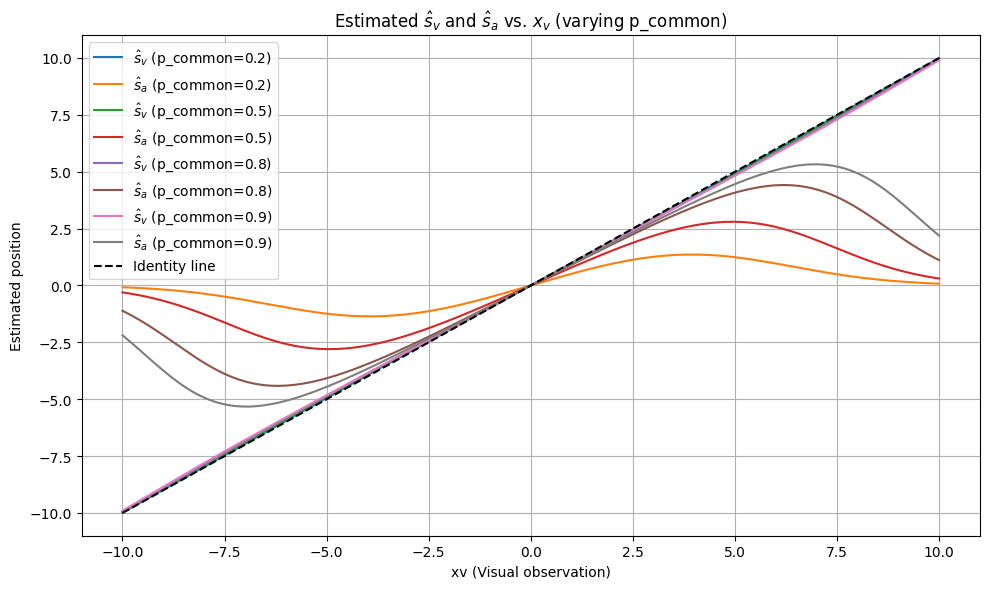

In [181]:
xv_vals = np.linspace(-10, 10, 200)
p_common_values = [0.2, 0.5, 0.8, 0.9]

plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="p_common", param_values=p_common_values, sigma_v=0.6,
                                  sigma_a=3.1, sigma_p=15.0, mu_p=0.0)

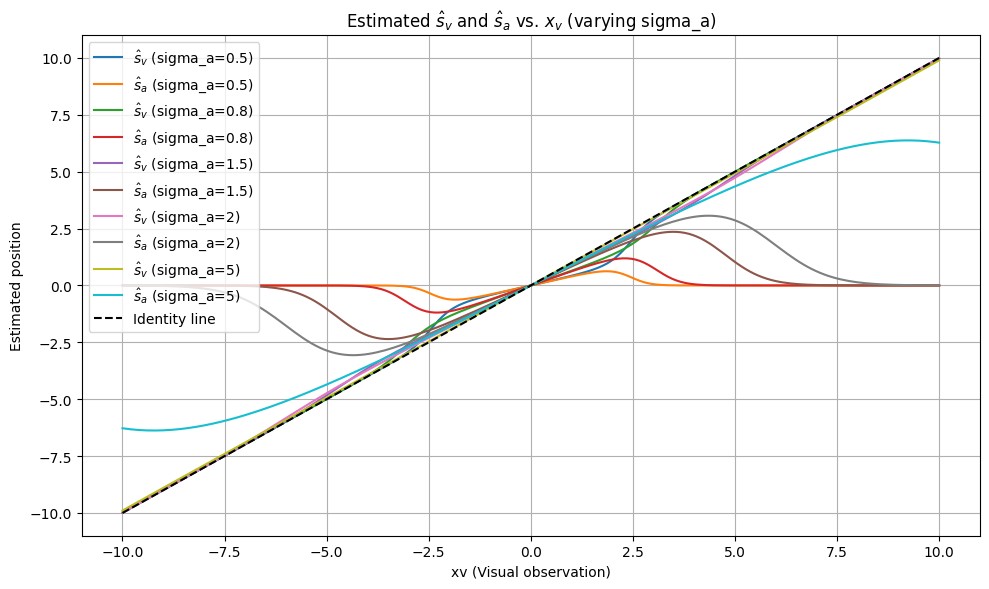

In [182]:
xv_vals = np.linspace(-10, 10, 200)

# Varying sigma_a
sigma_a_values = [0.5, 0.8, 1.5, 2, 5]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_a", param_values=sigma_a_values, sigma_v=0.6,
                                  sigma_p=15.0, mu_p=0.0)


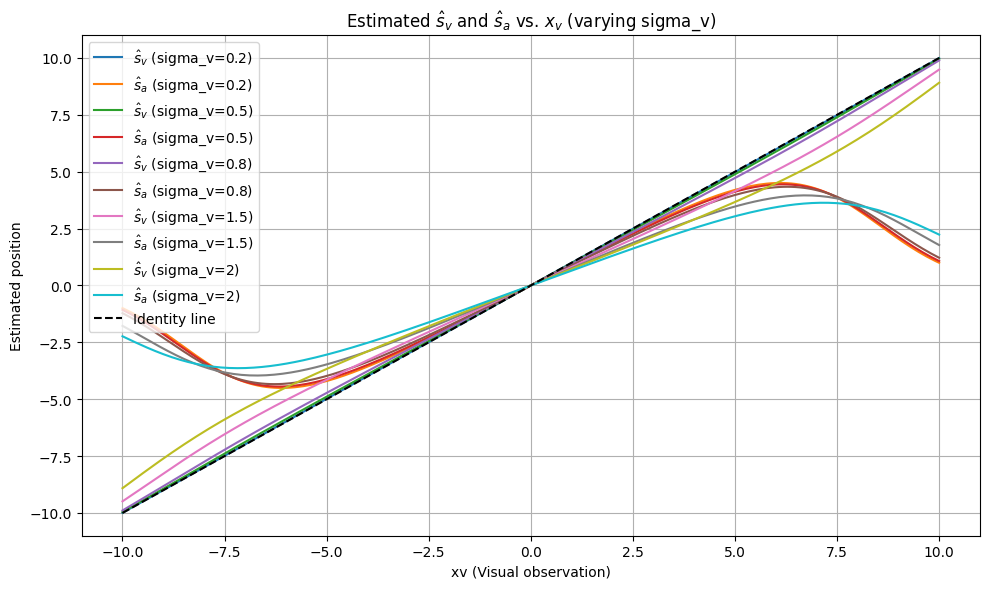

In [183]:
# Varying sigma_v
sigma_v_values = [0.2, 0.5, 0.8, 1.5, 2]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_v", param_values=sigma_v_values, sigma_a=3.1,
                                  sigma_p=15.0, mu_p=0.0)


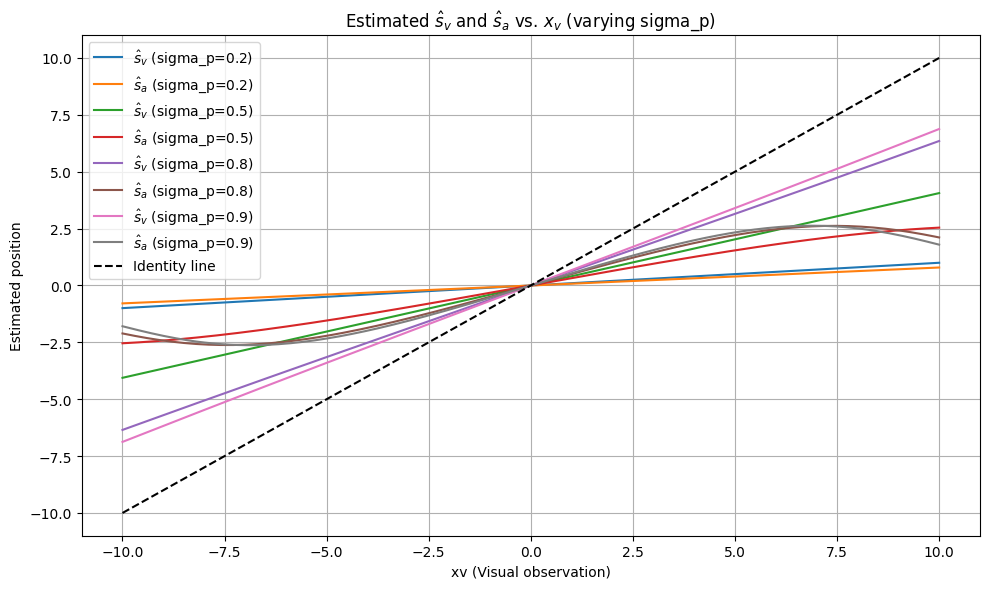

In [184]:
# Varying sigma_p
sigma_p_values = [0.2, 0.5, 0.8, 0.9]
plot_estimated_positions_combined(xv_vals, xa=0.0, param_name="sigma_p", param_values=sigma_p_values, sigma_v=0.6,
                                  sigma_a=3.1, mu_p=0.0)

### Part(e)  — Evaluate the integral in Equation 13 Monte Carlo Sampling analytically

Consider the integral in Equation 13, how might you evaluate it?


##### What kind of function is  $p(\hat{{s}}_v|x_v,x_a)$? How does it affect the analytical evaluation?
It represents the conditional distribution of the estimated visual position  $\hat{{s}}_v$​ given noisy sensory observations $x_v$ (visual) and $x_a$​ (auditory).
Due to noise and nonlinearities, analytic evaluation is hard. So we use a Monte-Carlo numerical approximation.

In [185]:
def mont_carlo_estimation(target_sv_hat, sv, sa, sigma_v, sigma_a, delta=0.1, n_samples=5000):
    xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
    xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
    sv_estimates = np.array([estimate_sv_sa(xv, xa)[0] for xv, xa in zip(xv_samples, xa_samples)])
    prob_density = np.mean(np.abs(sv_estimates - target_sv_hat) < delta)
    return prob_density

In [186]:
def plot_monte_carlo_distribution(sv_true_values, sa_true_values, sigma_v=0.6, sigma_a=3.1, delta=0.1, n_samples=6000):
    """
    Plot the distribution of estimated visual locations given arrays of true stimulus locations.

    Args:
        sv_true_values: Array of true visual stimulus locations.
        sa_true_values: Array of true auditory stimulus locations.
        sigma_v: Standard deviation of visual noise.
        sigma_a: Standard deviation of auditory noise.
        delta: Threshold for probability density estimation.
        n_samples: Number of Monte Carlo samples.
    """
    if len(sv_true_values) != len(sa_true_values):
        raise ValueError("sv_true_values and sa_true_values must have the same length.")

    plt.figure(figsize=(10, 6))

    for sv_true, sa_true in zip(sv_true_values, sa_true_values):
        sv_hat_range = np.linspace(-5, 5, 100)
        distribution = [mont_carlo_estimation(sv_hat, sv_true, sa_true, sigma_v, sigma_a, delta, n_samples)
                        for sv_hat in sv_hat_range]

        plt.plot(sv_hat_range, distribution, label=f'$s_v$={sv_true}, $s_a$={sa_true}')

    plt.xlabel('Estimated visual location ($\hat{s}_v$)')
    plt.ylabel('Probability density of the estimate $p(\hat{s}_v)$')
    plt.title('Numerical evaluation of Monte Carlo distribution')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:25: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\3934203337.py:25: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated visual location ($\hat{s}_v$)')
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\3934203337.py:26: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Probability density of the estimate $p(\hat{s}_v)$')


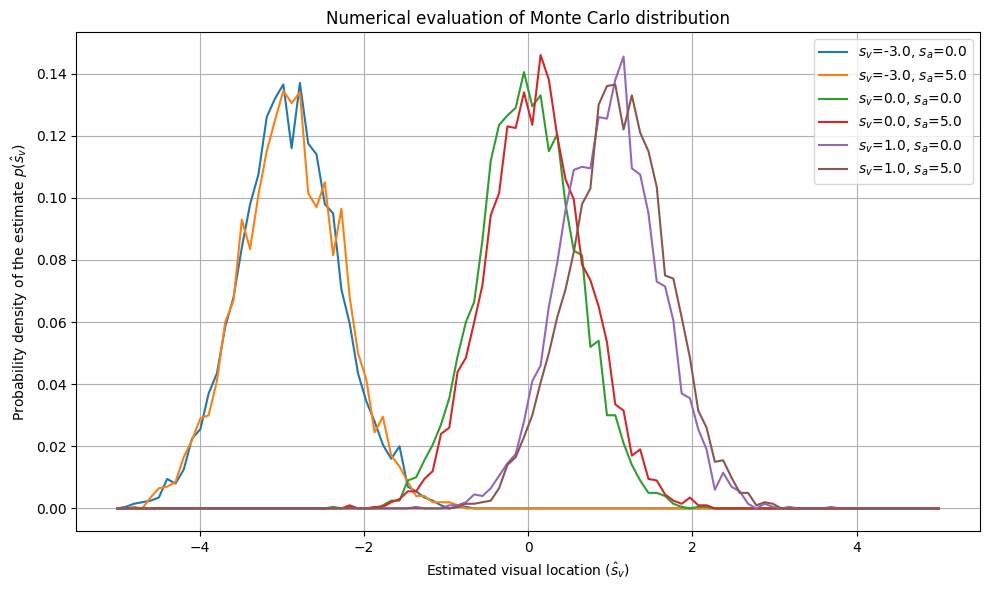

In [187]:
sv_true_values = [-3.0, -3.0, 0.0, 0.0, 1.0, 1.0]
sa_true_values = [0.0, 5.0, 0.0, 5.0, 0.0, 5.0, ]

plot_monte_carlo_distribution(sv_true_values, sa_true_values, sigma_v=0.6, sigma_a=3.1, delta=0.1, n_samples=2000)

We see the following in the plot: 
* peaks in the curves indicate the most probable estimated values $\hat{s}_v$ while different $s_v$ shift these peaks horizontally, showing how the estimator is influenced by the true stimulus.
* if $s_v$ not equal $s_a$ (e.g. compare [0,0] and [0,5]) we see that $s_a$ shift away the peak a little bit from the true $s_v$. 
* distribution spreads out, indicating certainty and weaker integration

This reflects how the brain infers, whether cues come from a common cause or not, core to the causal inference framework.

TODO REPO: We only really see a shift (caused by s_a is different to s_v) when comparing red/green and not for the other pairs even so its the same difference between s_v and s_a. Why?

### Part (f) — Evaluate the integral in Equation 13 using Monte Carlo sampling
The nature of $p(\hat{s}_v|x_v, x_a)$ also suggests a numerical method for obtaining estimates
of $p(\hat{s}_a|s_v, s_a)$ and $p(\hat{s}_v|s_v, s_a)$. 
Use that method to plot both as a function of $s_v$ assuming $s_a$ = 0 (use a heat-map for these plots).

In [188]:
p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()


def generate_sv_sa_heatmaps(sv_range=(-5, 5), sa=0.0, bins=50, delta=0.2, n_samples=1000):
    sv_vals = np.linspace(*sv_range, bins)
    shat_vals = np.linspace(*sv_range, bins)

    heatmap_sv = np.zeros((bins, bins))
    heatmap_sa = np.zeros((bins, bins))

    for i, sv in enumerate(sv_vals):
        xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
        xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
        estimates = [estimate_sv_sa(xv, xa) for xv, xa in zip(xv_samples, xa_samples)]
        shats_sv = np.array([e[0] for e in estimates])
        shats_sa = np.array([e[1] for e in estimates])
        for j, target_shat in enumerate(shat_vals):
            heatmap_sv[i, j] = np.mean(np.abs(shats_sv - target_shat) < delta)
            heatmap_sa[i, j] = np.mean(np.abs(shats_sa - target_shat) < delta)

    return sv_vals, shat_vals, heatmap_sv, heatmap_sa


<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:22: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\1166600946.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated visual location $\hat{s}_v$ ')
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\1166600946.py:22: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated auditory location $\hat{s}_a$')


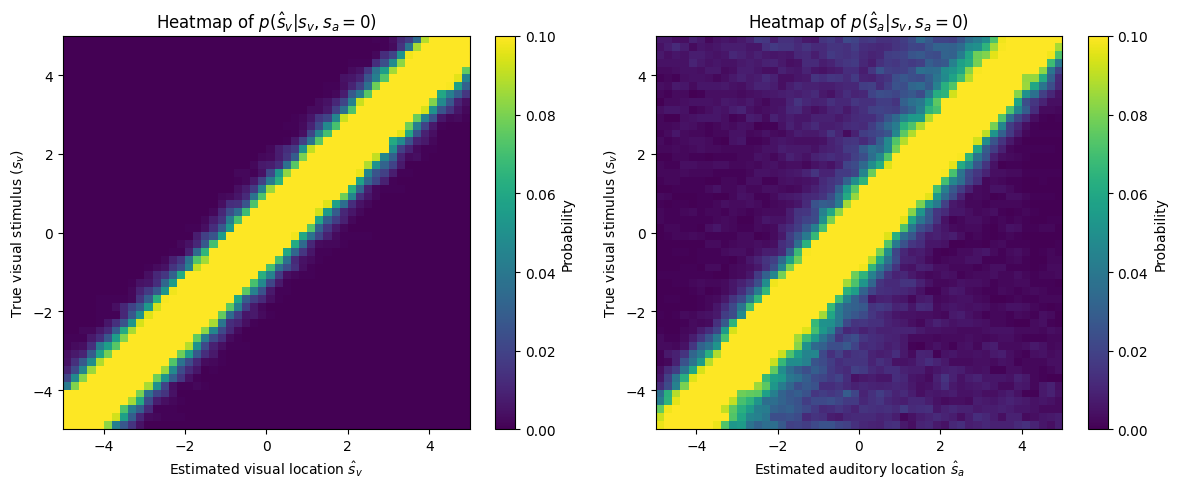

In [189]:
sv_vals, shat_vals, heatmap_sv, heatmap_sa = generate_sv_sa_heatmaps()

# Find the global min and max across both heatmaps
vmin = min(heatmap_sv.min(), heatmap_sa.min())
vmax = 0.1

# Plot the heatmap for p(ŝv | s_v, s_a)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(heatmap_sv, extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto', origin='lower',
           vmin=vmin, vmax=vmax)
plt.colorbar(label='Probability')
plt.xlabel('Estimated visual location $\hat{s}_v$ ')
plt.ylabel('True visual stimulus ($s_v$)')
plt.title('Heatmap of $p(\\hat{s}_v | s_v, s_a=0)$')

# Plot the heatmap for p(ŝa | s_v, s_a)
plt.subplot(1, 2, 2)
plt.imshow(heatmap_sa, extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto', origin='lower',
           vmin=vmin, vmax=vmax)
plt.colorbar(label='Probability')
plt.xlabel('Estimated auditory location $\hat{s}_a$')
plt.ylabel('True visual stimulus ($s_v$)')
plt.title('Heatmap of $p(\\hat{s}_a | s_v, s_a=0)$')

plt.tight_layout()
plt.show()



$P_{common}$=0.8

Left plot: <br>
The diagonal higher probability trend, indicates that with increase in $s_v$ also the estimated $\hat{s}_v$ increase. <br>
The blurring demonstraed the uncertainty. <br>
<br>
Right plot: <br>
Even so the true auditory stimulus is fixed at zero, the estimated auditory position  $\hat{s}_a$​ shifts with $s_v$, means the visual signal biases the auditory estimate​. This implies that the visual input influences the auditory estimate. This make sense as with $p_common$ = 0.8 we have a high prior belief of common cause and so an influence between the signals.<br>
Nevertheless we see more blurry results for estimated auditory signal, showing that we have more uncertainty for this data. ($\sigma_a$=3.1, $\sigma_v$=0.6)

TODO: True value of visual and auditory and look for p_common in heatmap.

<>:44: SyntaxWarning: invalid escape sequence '\h'
<>:53: SyntaxWarning: invalid escape sequence '\h'
<>:44: SyntaxWarning: invalid escape sequence '\h'
<>:53: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\264998905.py:44: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated visual location $\hat{s}_v$')
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\264998905.py:53: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Estimated auditory location $\hat{s}_a$')


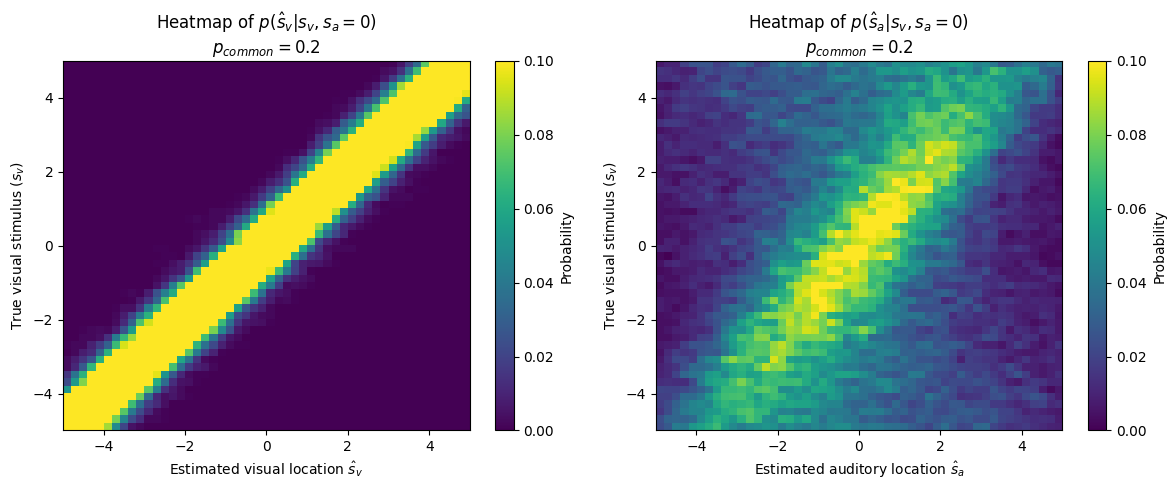

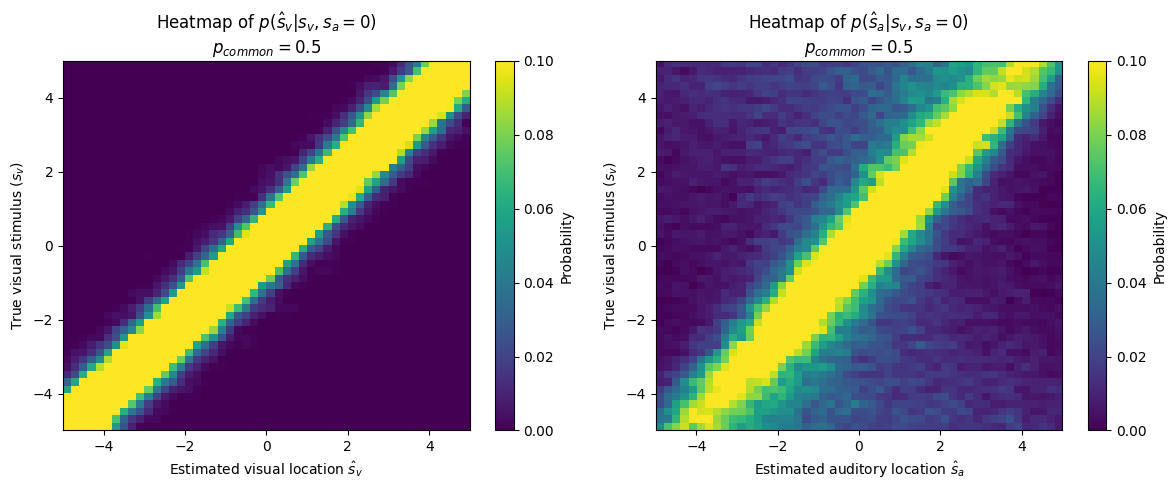

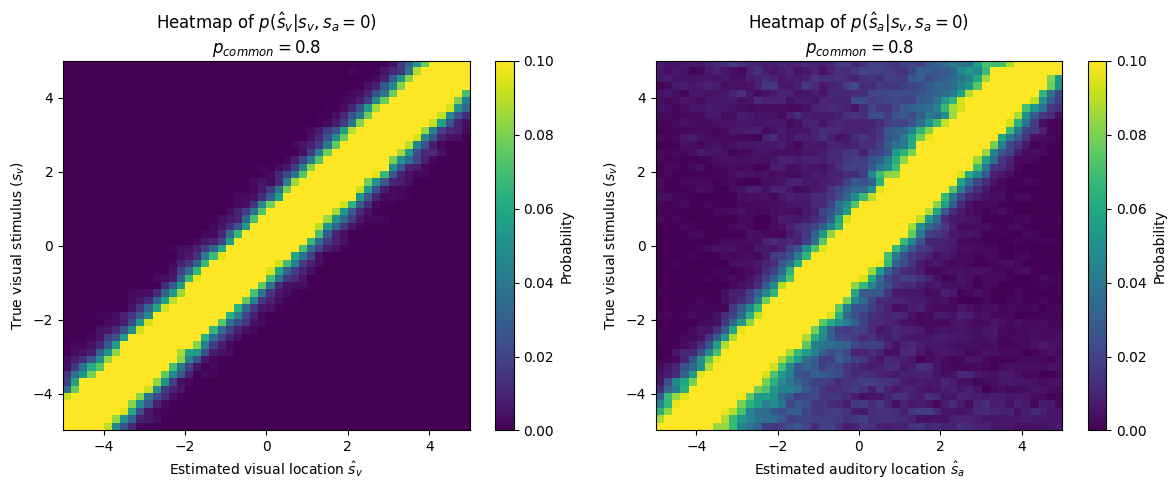

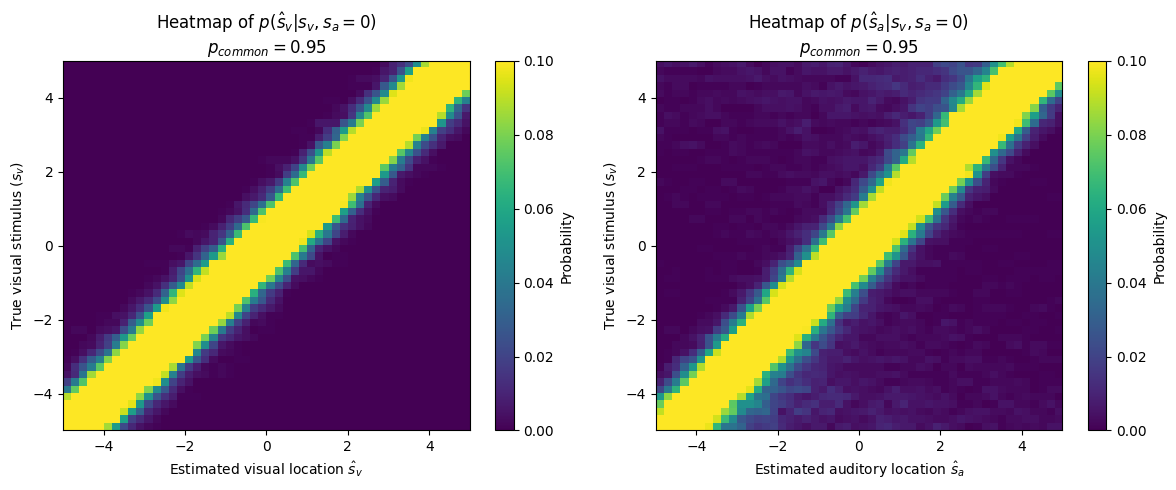

In [190]:
def generate_sv_sa_heatmaps_with_p_common(sv_range=(-5, 5), sa=0.0, bins=50, delta=0.2, n_samples=1000,
                                          p_common_values=None):
    sv_vals = np.linspace(*sv_range, bins)
    shat_vals = np.linspace(*sv_range, bins)

    heatmaps_sv = []
    heatmaps_sa = []

    if p_common_values is None:
        p_common_values = [0.2, 0.5, 0.8, 0.95]

    for p_common in p_common_values:
        heatmap_sv = np.zeros((bins, bins))
        heatmap_sa = np.zeros((bins, bins))

        for i, sv in enumerate(sv_vals):
            xv_samples = np.random.normal(sv, sigma_v, size=n_samples)
            xa_samples = np.random.normal(sa, sigma_a, size=n_samples)
            estimates = [estimate_sv_sa(xv, xa, p_common=p_common) for xv, xa in zip(xv_samples, xa_samples)]
            shats_sv = np.array([e[0] for e in estimates])
            shats_sa = np.array([e[1] for e in estimates])
            for j, target_shat in enumerate(shat_vals):
                heatmap_sv[i, j] = np.mean(np.abs(shats_sv - target_shat) < delta)
                heatmap_sa[i, j] = np.mean(np.abs(shats_sa - target_shat) < delta)

        heatmaps_sv.append(heatmap_sv)
        heatmaps_sa.append(heatmap_sa)

    return sv_vals, shat_vals, heatmaps_sv, heatmaps_sa, p_common_values


# Generate heatmaps
sv_vals, shat_vals, heatmaps_sv, heatmaps_sa, p_common_values = generate_sv_sa_heatmaps_with_p_common()

# Plot heatmaps for each p_common
for idx, p_common in enumerate(p_common_values):
    plt.figure(figsize=(12, 5))

    # Heatmap for p(ŝv | s_v, s_a)
    plt.subplot(1, 2, 1)
    plt.imshow(heatmaps_sv[idx], extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto',
               origin='lower', vmin=0, vmax=0.1)
    plt.colorbar(label='Probability')
    plt.xlabel('Estimated visual location $\hat{s}_v$')
    plt.ylabel('True visual stimulus ($s_v$)')
    plt.title(f'Heatmap of $p(\\hat{{s}}_v | s_v, s_a=0)$\n$p_{{common}}={p_common}$')

    # Heatmap for p(ŝa | s_v, s_a)
    plt.subplot(1, 2, 2)
    plt.imshow(heatmaps_sa[idx], extent=[shat_vals[0], shat_vals[-1], sv_vals[0], sv_vals[-1]], aspect='auto',
               origin='lower', vmin=0, vmax=0.1)
    plt.colorbar(label='Probability')
    plt.xlabel('Estimated auditory location $\hat{s}_a$')
    plt.ylabel('True visual stimulus ($s_v$)')
    plt.title(f'Heatmap of $p(\\hat{{s}}_a | s_v, s_a=0)$\n$p_{{common}}={p_common}$')

    plt.tight_layout()
    plt.show()

as the value for $p_{common}$ increases the noise for auditory decrease indicating the the model becomes more likely to integrate the visual and auditory cues — that is, it assumes more often that both signals come from a common cause.

### 2. Generate Experimental Data


In [191]:
p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

# Discretized spatial values
stimulus_values = np.array([-12, -6, 0, 6, 12])
N_repeats = 1000  # how many repetitions for each (sa, sv) pair
button_edges = [-np.inf, -9, -3, 3, 9, np.inf]

# Simulate trials
trial_data = []
for sv in stimulus_values:
    for sa in stimulus_values:
        for _ in range(N_repeats):
            xv = np.random.normal(sv, sigma_v)
            xa = np.random.normal(sa, sigma_a)
            sv_hat, sa_hat = estimate_sv_sa(xv, xa, p_common, sigma_v, sigma_a, sigma_p, mu_p)
            button_v = np.digitize(sv_hat, button_edges) - 1
            button_a = np.digitize(sa_hat, button_edges) - 1
            trial_data.append({
                "sv": sv, "sa": sa,
                "xv": xv, "xa": xa,
                "sv_hat": sv_hat, "sa_hat": sa_hat,
                "button_v": button_v, "button_a": button_a
            })

df_trials = pd.DataFrame(trial_data)

print(df_trials.head())
print(df_trials.shape)
print(df_trials[['sv', 'sa', 'xv', 'xa', 'sv_hat', 'sa_hat', 'button_v', 'button_a']].describe())


   sv  sa         xv         xa     sv_hat     sa_hat  button_v  button_a
0 -12 -12 -11.926698 -13.962142 -11.978728 -12.038534         0         0
1 -12 -12 -12.167379 -15.619122 -12.266443 -12.416776         0         0
2 -12 -12 -11.333003 -11.168602 -11.309826 -11.286856         0         0
3 -12 -12 -11.840096 -15.783862 -11.955126 -12.162222         0         0
4 -12 -12 -11.908905 -12.716675 -11.918604 -11.929741         0         0
(25000, 8)
                 sv            sa            xv            xa        sv_hat  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean       0.000000      0.000000      0.003215      0.016382      0.003454   
std        8.485451      8.485451      8.507513      9.025091      8.477520   
min      -12.000000    -12.000000    -14.112686    -23.388997    -14.090141   
25%       -6.000000     -6.000000     -6.388191     -7.467861     -6.386873   
50%        0.000000      0.000000      0.011878     -0.016655      0.01

### 2.a Histogram of button presses



In [201]:
# Optimized vectorized version of make_button_presses using np.histogram2d
def make_button_presses(trial_number, p_common, sigma_v, sigma_a, sigma_p, mu_p=0.0):
    '''
    Simulates N trials of multisensory perception for all (sv, sa) combinations,
    and returns a histogram of button presses for each pair.

    Parameters:
    - trial_number: int, number of trials per stimulus pair
    - p_common: float, prior probability of common cause
    - sigma_v: float, std deviation of visual noise
    - sigma_a: float, std deviation of auditory noise
    - sigma_p: float, std deviation of spatial prior
    - mu_p: float, mean of spatial prior (default = 0)

    Returns:
    - response_hist: dict with keys (sv, sa) and values as 5x5 histograms [visual x auditory]
    '''
      
    stimulus_values = np.array([-12, -6, 0, 6, 12])
    button_edges = np.array([-np.inf, -9, -3, 3, 9, np.inf])
    response_hist = {}

    for sv in stimulus_values:
        for sa in stimulus_values:
            xv = np.random.normal(sv, sigma_v, trial_number)
            xa = np.random.normal(sa, sigma_a, trial_number)

            sv_hat, sa_hat = estimate_sv_sa(
                xv, xa,
                p_common, sigma_v, sigma_a, sigma_p, mu_p
            )

            # Use histogram2d to replace manual loop
            hist, _, _ = np.histogram2d(
                sv_hat, sa_hat,
                bins=[button_edges, button_edges]
            )
            response_hist[(sv, sa)] = hist.astype(int)

    return response_hist

hist = make_button_presses(1000, p_common, sigma_v, sigma_a, sigma_p, mu_p=mu_p)
print("Key Size:", len(hist.keys()))
print("Value Size:", len(hist.values()))
print("Example Histogram for (sv=0, sa=0):")
print(hist[(0, 0)])


Key Size: 25
Value Size: 25
Example Histogram for (sv=0, sa=0):
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  5  33 923  35   4]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


In [ ]:

def make_button_presses_OLD(trial_number, p_common, sigma_v, sigma_a, sigma_p, mu_p=0.0):
    '''
    Simulates N trials of multisensory perception for all (sv, sa) combinations,
    and returns a histogram of button presses for each pair.

    Parameters:
    - trial_number: int, number of trials per stimulus pair
    - p_common: float, prior probability of common cause
    - sigma_v: float, std deviation of visual noise
    - sigma_a: float, std deviation of auditory noise
    - sigma_p: float, std deviation of spatial prior
    - mu_p: float, mean of spatial prior (default = 0)

    Returns:
    - response_hist: dict with keys (sv, sa) and values as 5x5 histograms [visual x auditory]
    '''

    stimulus_values = np.array([-12, -6, 0, 6, 12])
    button_edges = np.array([-np.inf, -9, -3, 3, 9, np.inf])
    response_hist = {}

    for sv in stimulus_values:
        for sa in stimulus_values:
            xv = np.random.normal(sv, sigma_v, trial_number)
            xa = np.random.normal(sa, sigma_a, trial_number)

            sv_hat, sa_hat = estimate_sv_sa(
                xv, xa,
                p_common, sigma_v, sigma_a, sigma_p, mu_p
            )

            b_v = np.digitize(sv_hat, button_edges) - 1
            b_a = np.digitize(sa_hat, button_edges) - 1

            hist = np.zeros((5, 5), dtype=int)
            for i in range(trial_number):
                hist[b_v[i], b_a[i]] += 1

            response_hist[(sv, sa)] = hist

    return response_hist

### 2.b Time the performance of the function `make_button_presses`


In [193]:
import time

p_common, sigma_v, sigma_a, sigma_p, mu_p = set_default_parameter()

# Time the performance for N = 10000 trials per condition (25 combinations => 250,000 trials)
start_time = time.time()
experimental_data = make_button_presses(
    trial_number=10000,
    p_common=p_common,
    sigma_v=sigma_v,
    sigma_a=sigma_a,
    sigma_p=sigma_p,
    mu_p=mu_p
)
elapsed_time_ms = (time.time() - start_time) * 1000  # in milliseconds

elapsed_time_ms, experimental_data[(0, 0)]  # show timing and one sample histogram
#SHK. The function `make_button_presses` took approximately 1.5 seconds to run for 10,000 trials per condition, generating a histogram of button presses for each (sv, sa) pair.

(198.1675624847412,
 array([[   0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0],
        [   4,   99, 9810,   81,    6],
        [   0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0]]))

In [194]:
#plot histogram of experimental data
def plot_experimental_histogram(data, sv, sa):
    hist = data[(sv, sa)]
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(hist, cmap='viridis', origin='lower')
    ax.set_title(f'Button Press Histogram\n(sv={sv}, sa={sa})')
    ax.set_xlabel('Auditory Button')
    ax.set_ylabel('Visual Button')
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    plt.colorbar(im, ax=ax, label='Count')
    plt.tight_layout()
    plt.show()


### 2.b Visualize the histograms of button presses

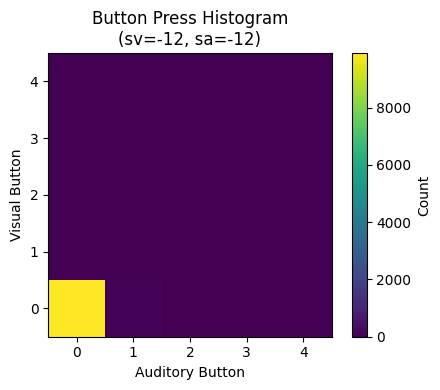

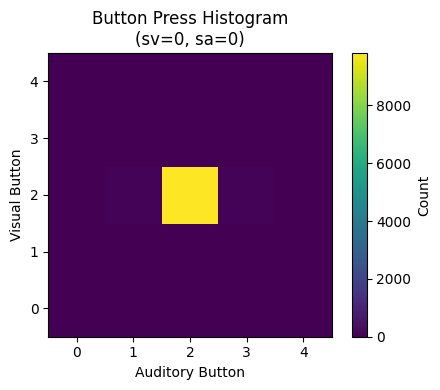

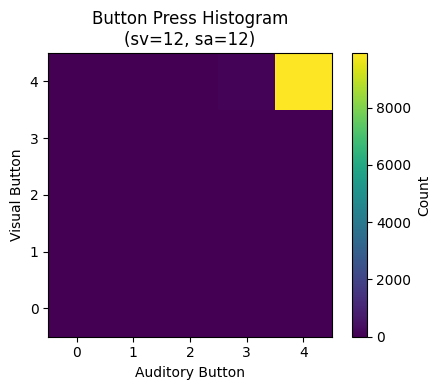

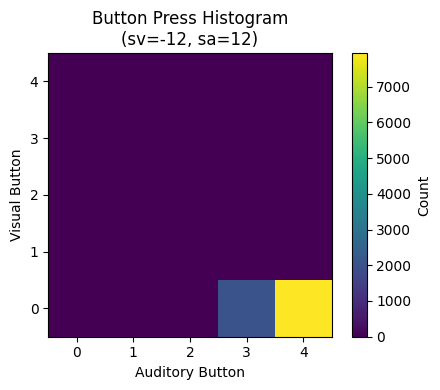

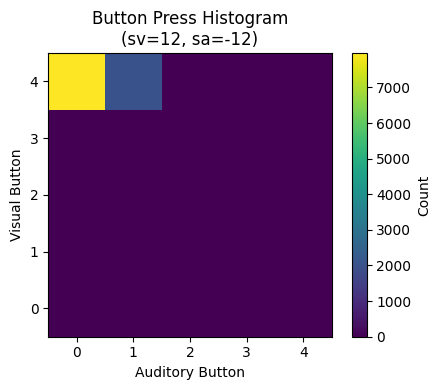

In [195]:
def plot_histogram(hist, sv, sa):
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(hist, cmap='viridis', origin='lower')
    ax.set_title(f'Button Press Histogram\n(sv={sv}, sa={sa})')
    ax.set_xlabel('Auditory Button')
    ax.set_ylabel('Visual Button')
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    plt.colorbar(im, ax=ax, label='Count')
    plt.tight_layout()
    plt.show()


# Visualize histograms for selected (sv, sa) pairs
selected_pairs = [(-12, -12), (0, 0), (12, 12), (-12, 12), (12, -12)]
for sv, sa in selected_pairs:
    plot_histogram(experimental_data[(sv, sa)], sv, sa)


The histograms show the distribution of button presses for different combinations of visual and auditory stimuli.

The first two integrated stimuli (-12, -12) and (0, 0) show strong diagonal alignement (Integration). The other two stimuli (-12, 12) and (12, -12) show dispersed button presses (segregation), indicating that participants are less certain about the location of the stimulus when the visual and auditory stimuli are far apart.

In [196]:
def compute_log_likelihood(params, observed_data, N_sim=100000, epsilon=0.0):
    """
    Computes the total log-likelihood of observed button press data under a given model.
    
    Parameters:
    - params: tuple (p_common, sigma_v, sigma_a, sigma_p)
    - observed_data: dictionary {(sv, sa): 5x5 histogram of observed counts}
    - N_sim: number of simulated trials per stimulus pair to estimate model probabilities
    - epsilon: small constant added to probabilities to avoid log(0)

    Returns:
    - total_log_likelihood: float
    """
    p_common, sigma_v, sigma_a, sigma_p, mu_p = params

    # Simulate predicted model responses
    model_data = make_button_presses(N_sim, p_common, sigma_v, sigma_a, sigma_p, mu_p)

    total_log_likelihood = 0.0

    for key in observed_data:
        obs_hist = observed_data[key]
        model_hist = model_data[key]

        # Convert model histogram to probabilities
        model_prob = model_hist / model_hist.sum()

        # Compute log-likelihood contribution for this (sv, sa)
        log_likelihood = np.sum(obs_hist * np.log(model_prob + epsilon))
        total_log_likelihood += log_likelihood

    return total_log_likelihood

In [197]:
params = set_default_parameter()

logL_true = compute_log_likelihood(
    params=params,
    observed_data=experimental_data,
    N_sim=100000  # simulate 10x trials for likelihood estimation
) #epsilon set to zero
print("Log-likelihood for true parameters:", logL_true)

Log-likelihood for true parameters: nan


C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\3623231425.py:29: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(obs_hist * np.log(model_prob + epsilon))
C:\Users\Shokoofeh\AppData\Local\Temp\ipykernel_14780\3623231425.py:29: RuntimeWarning: invalid value encountered in multiply
  log_likelihood = np.sum(obs_hist * np.log(model_prob + epsilon))


In [198]:
params = set_default_parameter()
#    params=(0.8, 0.6, 3.1, 15),

logL_true = compute_log_likelihood(
    params=params,
    observed_data=experimental_data,
    N_sim=100000,  # simulate 10x trials for likelihood estimation
    epsilon=1e-12
)
print("Log-likelihood for true parameters with epsilon:", logL_true)

Log-likelihood for true parameters with epsilon: -165145.09023870662


In [199]:
bad_params = (0.1, 5.0, 0.2, 2.0,0.0)  # poor guesses for p_common, sigma_v, sigma_a, sigma_p

logL_bad = compute_log_likelihood(
    params=bad_params,
    observed_data=experimental_data,
    N_sim=100000,  # high-resolution estimate
    epsilon=1e-12    # intentionally omit epsilon to test for numerical issues
)
print("Log-likelihood for bad parameters:", logL_bad)

Log-likelihood for bad parameters: -4238977.45040013


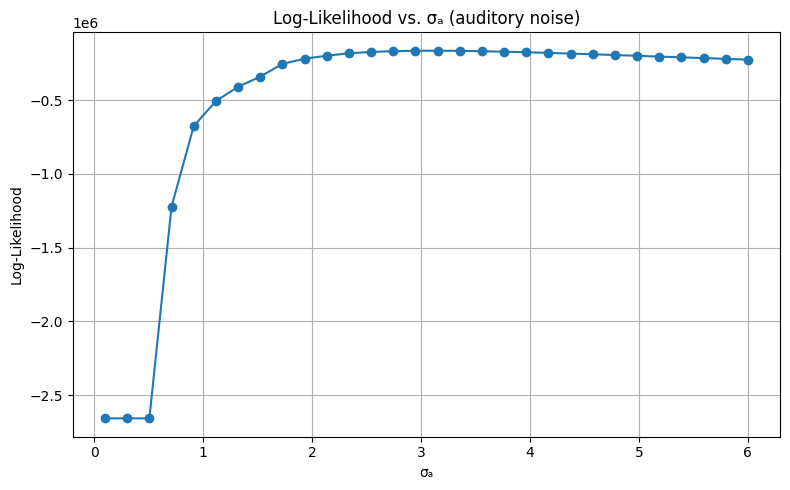

In [202]:
# Define a grid over one parameter (e.g., sigma_a) while keeping others fixed
sigma_a_values = np.linspace(0.1, 6.0, 30)  # 30 values from 0.1 to 6.0
log_likelihoods = []

p_common_fixed = 0.8
sigma_v_fixed = 0.6
sigma_p_fixed = 15
mu_p_fixed = 0.0

# Evaluate log-likelihood as a function of sigma_a
for sigma_a in sigma_a_values:
    ll = compute_log_likelihood(
        params=(p_common_fixed, sigma_v_fixed, sigma_a, sigma_p_fixed, mu_p_fixed),
        observed_data=experimental_data,
        N_sim=100000,
        epsilon=1e-12
    )
    log_likelihoods.append(ll)

# Plot the result
plt.figure(figsize=(8, 5))
plt.plot(sigma_a_values, log_likelihoods, marker='o')
plt.title("Log-Likelihood vs. σₐ (auditory noise)")
plt.xlabel("σₐ")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()
